In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes #diabete

In [ ]:
diabete=load_diabetes()
df=pd.DataFrame(diabete.data, columns=diabete.feature_names)
df['degree']=diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,degree
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
input=diabete.data
output=df['degree']

In [ ]:
input.shape

(442, 10)

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [ ]:
from sklearn.linear_model import Ridge, Lasso
RG=Ridge(alpha=0.1)#high alpha, high regulation
RG.fit(train_input,train_output)
LS=Lasso(alpha=0.1)#alpha
LS.fit(train_input,train_output)

Lasso(alpha=0.1)

In [ ]:
np.corrcoef(RG.predict(test_input),test_output)

array([[1.      , 0.747442],
       [0.747442, 1.      ]])

In [ ]:
np.corrcoef(LS.predict(test_input),test_output)

array([[1.        , 0.75163329],
       [0.75163329, 1.        ]])

In [ ]:
RG.n_features_in_,LS.n_features_in_

(10, 10)

In [ ]:
diabete.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
RG.coef_

array([  41.54469591, -153.62240695,  457.77434293,  285.98788018,
        -69.69367983, -142.47657957, -141.16854485,  149.12610985,
        395.47091303,  112.4135578 ])

In [ ]:
LS.coef_

array([   0.        ,  -89.81588238,  500.20961725,  269.85640676,
         -0.        ,  -96.37221126, -180.28795042,    0.        ,
        440.63626481,   67.40057767])

In [ ]:
RG2=Ridge(alpha=1)#high alpha, high regulation
RG2.fit(train_input,train_output)
LS2=Lasso(alpha=1)#alpha
LS2.fit(train_input,train_output)

Lasso(alpha=1)

In [ ]:
np.corrcoef(RG2.predict(test_input),test_output)

array([[1.        , 0.72512458],
       [0.72512458, 1.        ]])

In [ ]:
np.corrcoef(LS2.predict(test_input),test_output)

array([[1.        , 0.72478907],
       [0.72478907, 1.        ]])

In [ ]:
RG3=Ridge(alpha=5)#high alpha, high regulation
RG3.fit(train_input,train_output)
LS3=Lasso(alpha=5)#alpha
LS3.fit(train_input,train_output)

Lasso(alpha=5)

In [ ]:
np.corrcoef(RG3.predict(test_input),test_output)

array([[1.        , 0.68903624],
       [0.68903624, 1.        ]])

In [ ]:
np.corrcoef(LS3.predict(test_input),test_output)

array([[ 1.00000000e+00, -8.74383237e-17],
       [-8.74383237e-17,  1.00000000e+00]])

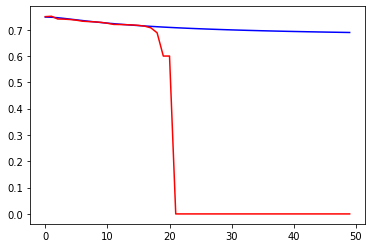

In [ ]:
RG_corr=[]
LS_corr=[]
i_num=0
for i in np.arange(0.01,5.0,0.1):
  RG=Ridge(alpha=i)
  RG.fit(train_input,train_output)
  LS=Lasso(alpha=i)
  LS.fit(train_input,train_output)
  RG_corr.append(np.corrcoef(RG.predict(test_input),test_output)[0][1])
  LS_corr.append(np.corrcoef(LS.predict(test_input),test_output)[0][1])
  i_num+=1
plt.plot(range(i_num),RG_corr,'b')
plt.plot(range(i_num),LS_corr,'r')